# Gausova Kvadratura a Legendrovy polynomy

imports:

In [1]:
import Kvadratury as kv
from matplotlib import pyplot as plt
from matplotlib import colormaps
from matplotlib import colors
import numpy as np


# Legendre Polynomials

#### Legendre:

(1000,)


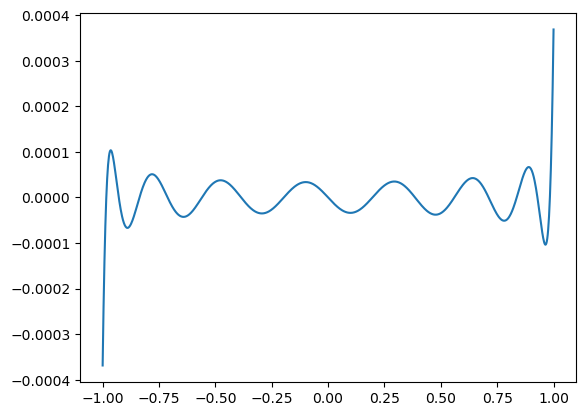

In [2]:

matrix_size=15
t = np.linspace(-1, 1, 1000)
print(t.shape)
l = kv.legendre(t, 30)
plt.plot(t, l[matrix_size])

#### Normal Legendre:

(1000,)


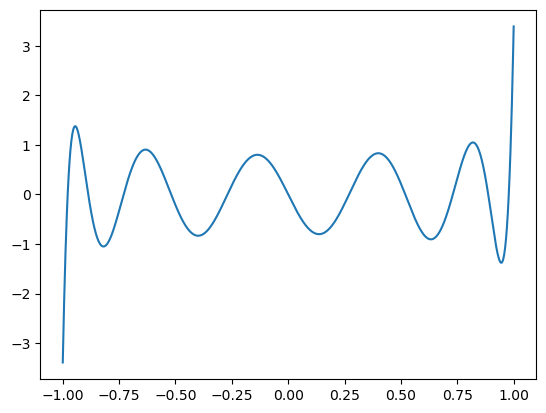

In [3]:
matrix_size=11
t = np.linspace(-1, 1, 1000)
print(t.shape)
l = kv.legendre_normal(t, 50)
plt.plot(t, l[matrix_size])

#### Legendre over interval (a,b):

(1000,)


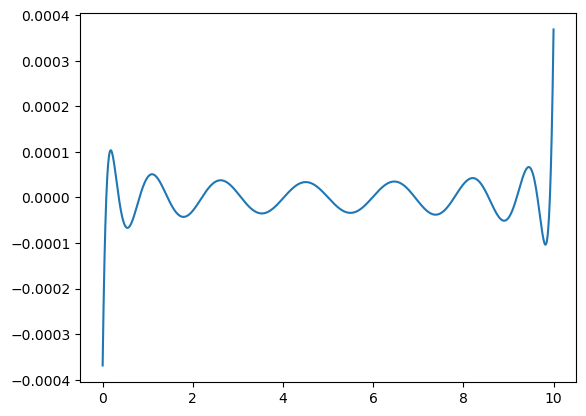

In [4]:
matrix_size=15
a = 0
b = 10
t = np.linspace(a, b, 1000)
print(t.shape)
l = kv.legendre_int(t, 50, a, b)
plt.plot(t, l[matrix_size])

#### Normal Legendre over interval (a,b):

(1000,)


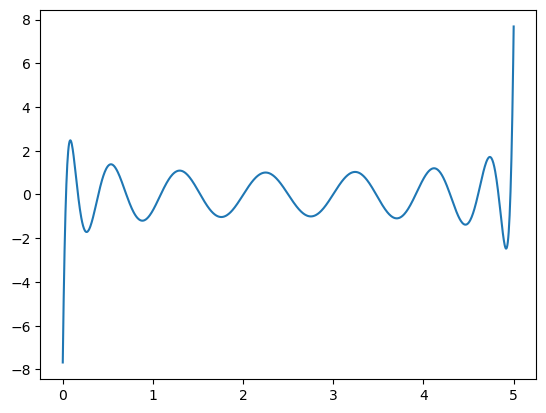

In [5]:
matrix_size=15
a = 0
b = 5
t = np.linspace(a, b, 1000)
print(t.shape)
l = kv.legendre_normal_int(t, 100, a, b)
plt.plot(t, l[matrix_size])

# Calculating integrals using Gauss Quadrature rule and a Jakobi matrix

In [6]:
matrix_size=100
f = lambda x: x**2
fI = lambda x: x**3/3
Gq = kv.quadrature(f,matrix_size)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", fI(1)-fI(-1))
print("error:", Gq - (fI(1)-fI(-1)))

Gauss-quadrature: 0.6666666666666639
actual value of integral: 0.6666666666666666
error: -2.7755575615628914e-15


##### over interval (a,b)

In [7]:
matrix_size = 100
a = 10
b = 25
f = lambda x: np.sin(x)
fI = lambda x: -np.cos(x)
Gq = kv.quadrature_int(f, matrix_size, a, b)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", fI(b)-fI(a))
print("error:", Gq - (fI(b)-fI(a)))

Gauss-quadrature: -1.8302743409399347
actual value of integral: -1.830274340939926
error: -8.659739592076221e-15


## Konvergation graphs 

0.0


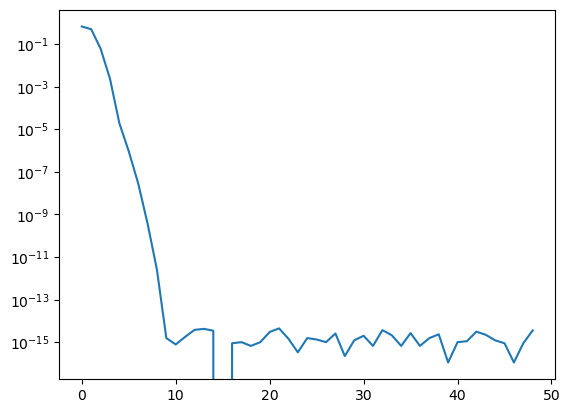

In [8]:
matrix_size = 50
def f(x): return np.exp(x)*np.sin(np.pi*x)
res = []
for i in range(1, matrix_size):
    res.append(abs(kv.quadrature(f, i) - 0.67932618340209469947815632370907306163177032877927709391270561911906360182))
plt.plot(res)
plt.yscale('log')
print(res[15])

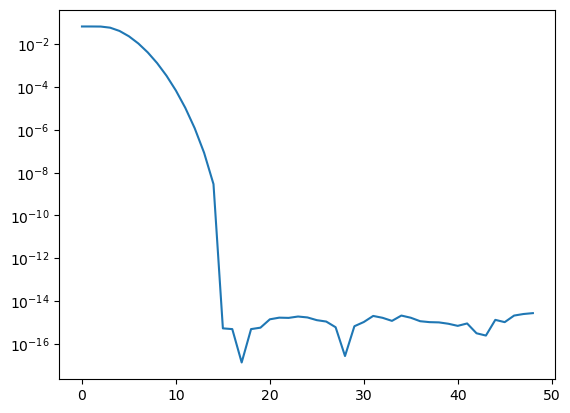

In [9]:
matrix_size=50
f = lambda x: x**30
fI = lambda x: x**31/31
res = []
for i in range(1, matrix_size):
    res.append(abs(kv.quadrature(f, i) - (fI(1)-fI(-1))))
plt.plot(res)
plt.yscale('log')

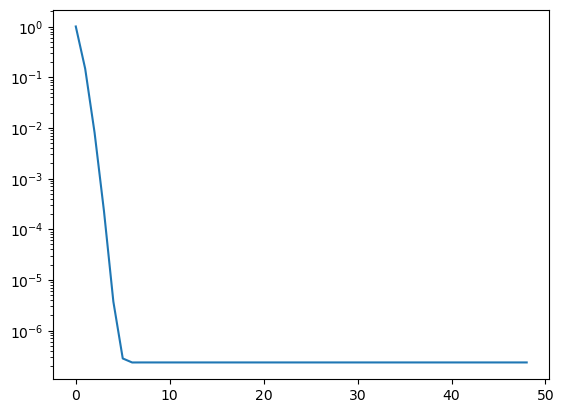

In [10]:
matrix_size=50
a = 5
b = 10
f = lambda x: np.sin(x)/np.log(5*x)
fI = 0.287556
res = []
for i in range(1, matrix_size):
    res.append(abs(kv.quadrature_int(f, i, a, b) - fI))
plt.plot(res)
plt.yscale('log')

over interval <a,b>

In [11]:
matrix_size=50
f = lambda x: np.sin(x)

#### 2D polynomials:

(100, 120)
(100, 120)


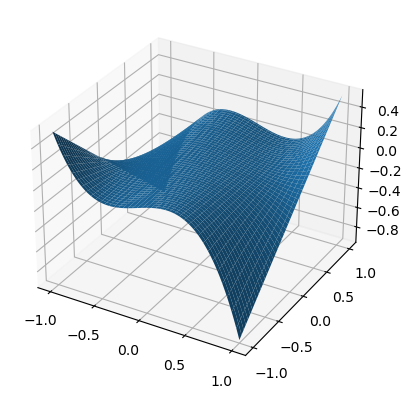

In [12]:
nx, ny = (120, 100)
a = -1
b = 1
c = -1
d = 1
xx = np.linspace(a, b, nx)
yy = np.linspace(c, d, ny)
X, Y = np.meshgrid(xx, yy)
l = kv.generate2DLegendre(X, Y, 500)
print(Y.shape)
print(X.shape)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, l[2])
plt.show()


#### 2D quadrature over interval <a,b>x<c,d>:

In [13]:
nx=500
ny=600
a = 5
b = 10
c = 10
d = 13
def f(x,y):
    return np.sin(x+y)/np.log(5*y)
fI = 0.07714107601915701

print(kv.quadrature_2d_int(f, nx, ny, a, b, c, d)-fI)

-2.733924198139448e-15


0.07714107601915704


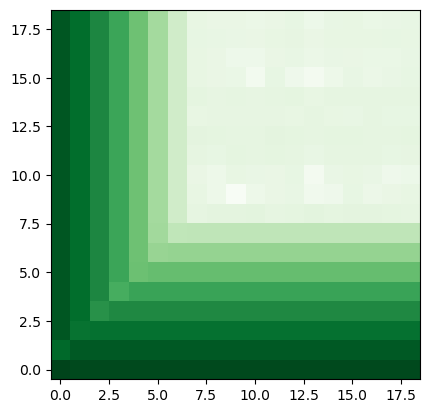

In [14]:
nx=20
ny=20
minx = 1
miny = 1
a = 5
b = 10
c = 10
d = 13
def f(x,y):
    return np.sin(x+y)/np.log(5*y)
fI = 0.07714107601915701
print(kv.quadrature_2d_int(f, nx, ny, a, b, c, d))

xx=np.arange(minx, nx)
yy=np.arange(miny, ny)

X, Y = np.meshgrid(xx, yy)
res = []
for x in xx:
    res_line = []
    for y in yy:
        res_line.append(kv.quadrature_2d_int(f, x, y, a, b, c, d))
    res.append(res_line)
res = np.array(res)
Z = abs(res-fI)
fig, ax = plt.subplots()

ax.imshow(Z, origin='lower', cmap=colormaps['Greens'], norm=colors.LogNorm())
plt.show()


---

testing of integrals in the Galerkin Method for Spectral Decomposition 2.4.1, page 38, (2.13)

[[ 1.00000000e+00  7.07767178e-16 -4.59875193e-15  5.29784550e-15]
 [ 7.07767178e-16  1.00000000e+00  5.26510259e-15 -5.97178557e-15]
 [-4.59875193e-15  5.26510259e-15  1.00000000e+00  5.12263842e-15]
 [ 5.29784550e-15 -5.97178557e-15  5.12263842e-15  1.00000000e+00]]


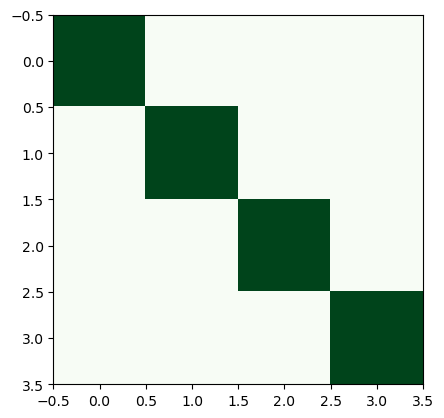

In [15]:

l = lambda x : kv.legendre_normal(x, 100)

matrix_size = 4
matrix = np.zeros((matrix_size,matrix_size))
for i in range(matrix_size):
    for j in range(matrix_size):
        matrix[i,j] = kv.quadrature(lambda x : l(x)[i]*l(x)[j], 100)
print(matrix)

# plot
fig, ax = plt.subplots()


ax.imshow(matrix, cmap=colormaps['Greens'])
plt.show()

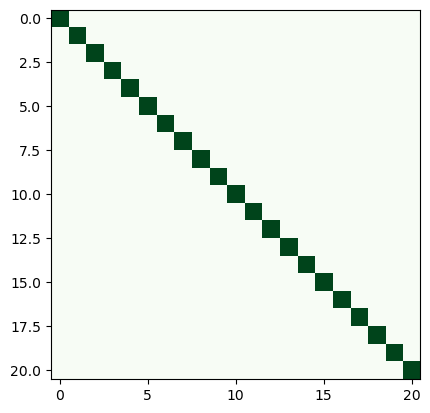

In [16]:
l = lambda x : kv.legendre_normal(x, 20)

n = 50


nodes, weights = kv.nodes_weights(n)

values = l(nodes)


matrix = ((values * weights) @ values.T)
#print(values)
#print(values * weights)


# plot
fig, ax = plt.subplots()

ax.imshow(matrix, cmap=colormaps['Greens'])
plt.show()


with interval <a,b>:

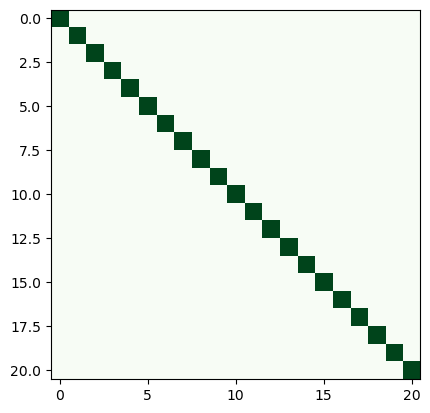

In [17]:
a = 0
b = 5
l = lambda x : kv.legendre_normal(((a+b)/(a-b) + (2/(b-a))*x), 20)

n = 50


nodes, weights = kv.nodes_weights(n)

nodes = (a+b)/2 + (b-a)/2*nodes
weights = weights * (b-a)/2

values = l(nodes)


matrix = ((values * weights) @ values.T)
#print(values)
#print(values * weights)

# plot
fig, ax = plt.subplots()

ax.imshow(matrix, cmap=colormaps['Greens'])
plt.show()

Intagral with Covariance funtion

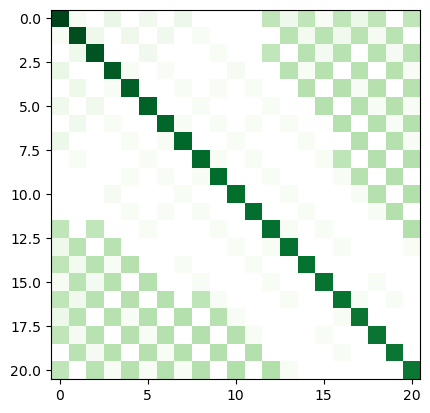

In [18]:
l = lambda x : kv.legendre_normal(x, 20)
cov = lambda x,y : np.exp(-np.abs(x-y))

n = 100


nodes, weights = kv.nodes_weights(n)

nodesx, nodesy = np.meshgrid(nodes,nodes)
values = l(nodes)

#print(cov(nodesx, nodesy))

A = (values * weights)
matrix = A @ (cov(nodesx, nodesy) )@ A.T
#print(matrix)

# plot
fig, ax = plt.subplots()

#ax.imshow(matrix, cmap=colormaps['Greens'])
ax.imshow(matrix, cmap=colormaps['Greens'], norm=colors.LogNorm())
plt.show()

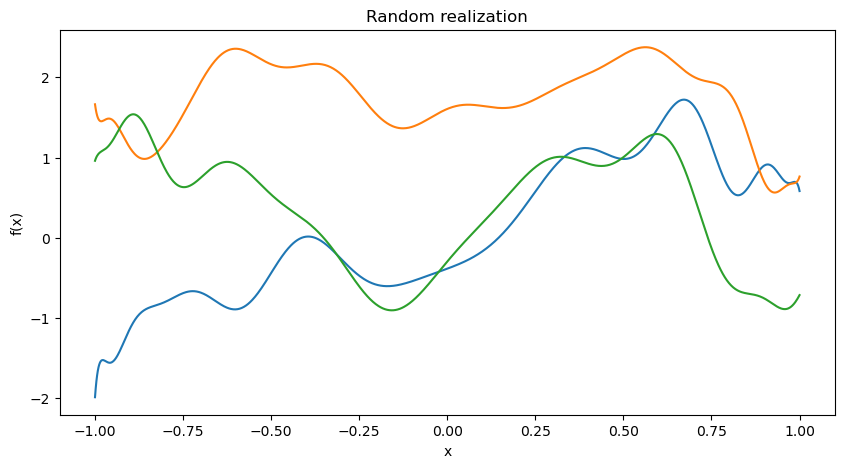

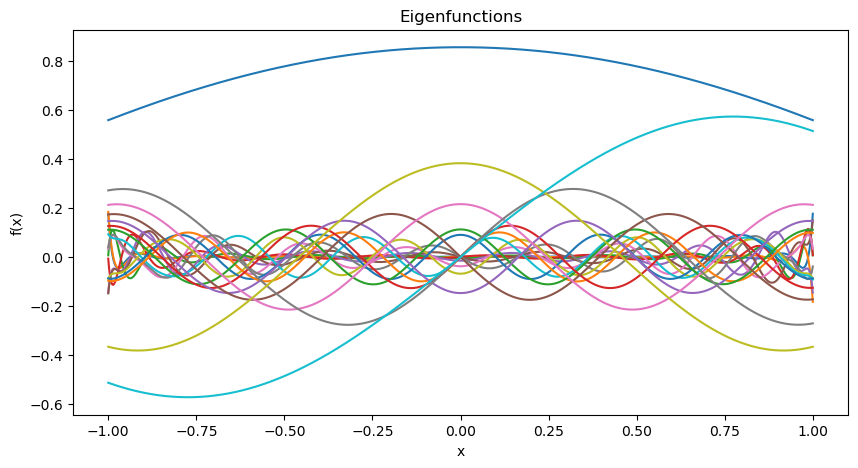

In [19]:
# eigendecomposition of matrix
eigenvalues, eigenvectors = np.linalg.eigh(matrix)
x_axis = np.linspace(-1, 1, 1000)
values = l(x_axis)
eigenvectors_functions = (values.T @ eigenvectors) * np.sqrt(np.maximum(eigenvalues, 0))

# random realization
n = eigenvectors_functions.shape[1]

plt.figure(figsize=(10, 5))
for i in range(3):
    realisation = np.random.normal(size=n)
    realisation = eigenvectors_functions @ realisation

    plt.plot(x_axis, realisation)


plt.title('Random realization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


# eigenfunctions visualization
plt.figure(figsize=(10, 5))
for fnc in eigenvectors_functions.T:
    plt.plot(x_axis, fnc)
plt.title('Eigenfunctions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

(21, 50)


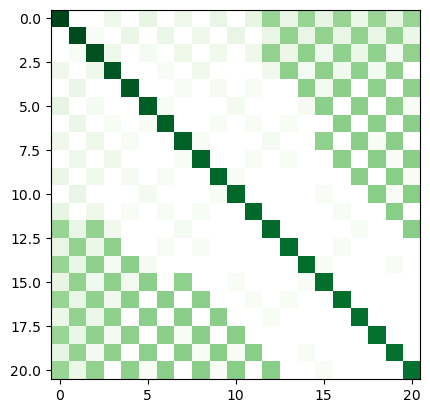

In [49]:
a = -2
b = 1
l = lambda x : kv.legendre_normal(x, 20)
cov = lambda x,y : np.exp(-np.abs(x-y))

n = 50


nodes, weights = kv.nodes_weights(n)

nodes = (a+b)/2 + (b-a)/2*nodes
weights = weights * (b-a)/2


nodesx, nodesy = np.meshgrid(nodes,nodes)
values = l((a+b)/(a-b) + (2/(b-a))*nodes)

#print(cov(nodesx, nodesy))
A = (values* weights)
matrix = A @ cov(nodesx, nodesy) @ A.T
#print(matrix)

#print(weights.shape)
#print(nodes.shape)
print(values.shape)
#print(cov(nodesx, nodesy).shape)
#print(matrix.shape)



# plot
fig, ax = plt.subplots()

#ax.imshow(matrix, cmap=colormaps['Greens'])
ax.imshow(matrix, cmap=colormaps['Greens'], norm=colors.LogNorm())
plt.show()

(21, 1000) (21,) (21, 21) (1000, 21)


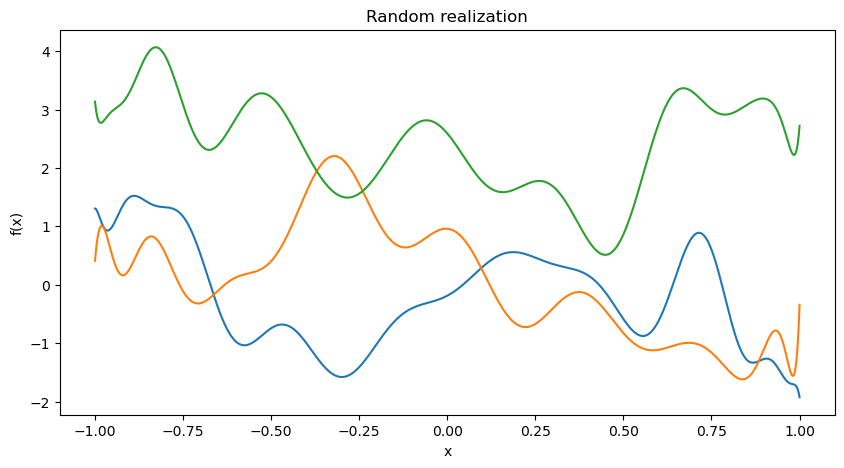

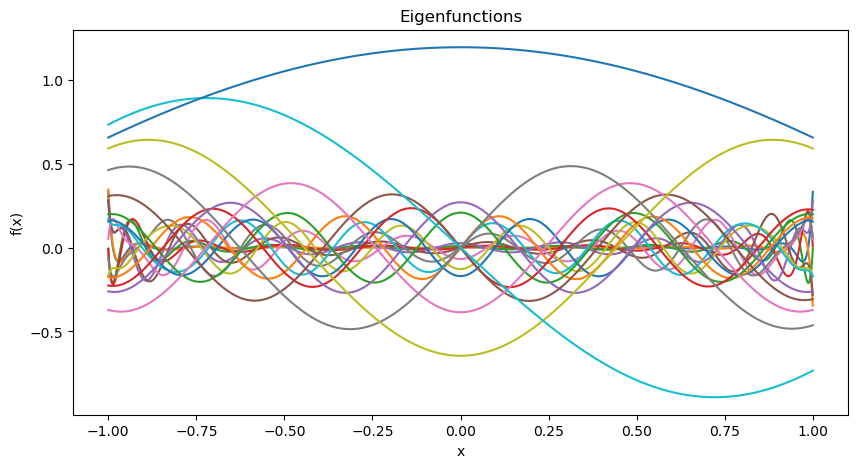

In [67]:
# eigendecomposition of matrix
eigenvalues, eigenvectors = np.linalg.eigh(matrix)
x_axis = np.linspace(-1, 1, 1000)
values = l(x_axis)
eigenvectors_functions = (values.T @ eigenvectors) * np.sqrt(np.maximum(eigenvalues, 0))
print(values.shape, eigenvalues.shape, eigenvectors.shape, eigenvectors_functions.shape)

# random realization
n = eigenvectors_functions.shape[1]

plt.figure(figsize=(10, 5))
for i in range(3):
    realisation = np.random.normal(size=n)
    realisation = eigenvectors_functions @ realisation

    plt.plot(x_axis, realisation)


plt.title('Random realization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


# eigenfunctions visualization
plt.figure(figsize=(10, 5))
for fnc in eigenvectors_functions.T:
    plt.plot(x_axis, fnc)
plt.title('Eigenfunctions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [59]:
l = lambda x: kv.legendre_normal(x, 20)
#cov = lambda x1, x2, y1, y2 : np.exp(-np.abs( np.sqrt( (x1-x2)**2+(y1-y2)**2 )))

n = 100


nodes, weights = kv.nodes_weights(n)

nodesx1, nodesx2, nodesy1, nodesy2 = np.meshgrid(nodes, nodes, nodes, nodes)
values = l(nodes)

#print(cov(nodesx1, nodesx2, nodesy1, nodesy2).shape)
#print(values.shape)
dist_sq = (nodesx1 - nodesx2)**2 + (nodesy1 - nodesy2)**2
C_tensor = np.exp(-np.sqrt(dist_sq))


#matrix = (values* weights) @ cov(nodesx1, nodesx2, nodesy1, nodesy2) @ (values.T * weights[:, np.newaxis])
PW = (values* weights)
A_tensor = np.einsum('kp,lq,pqrs,ir,js->klij', PW, PW, C_tensor, PW, PW, optimize=True)
A_tensor.shape


(21, 21, 21, 21)

(21, 1000, 1000) (21, 21, 21)
(21, 21, 21) (21, 21, 21, 21)
Generating 3x4 grid of plots...
(21,) (21, 21)


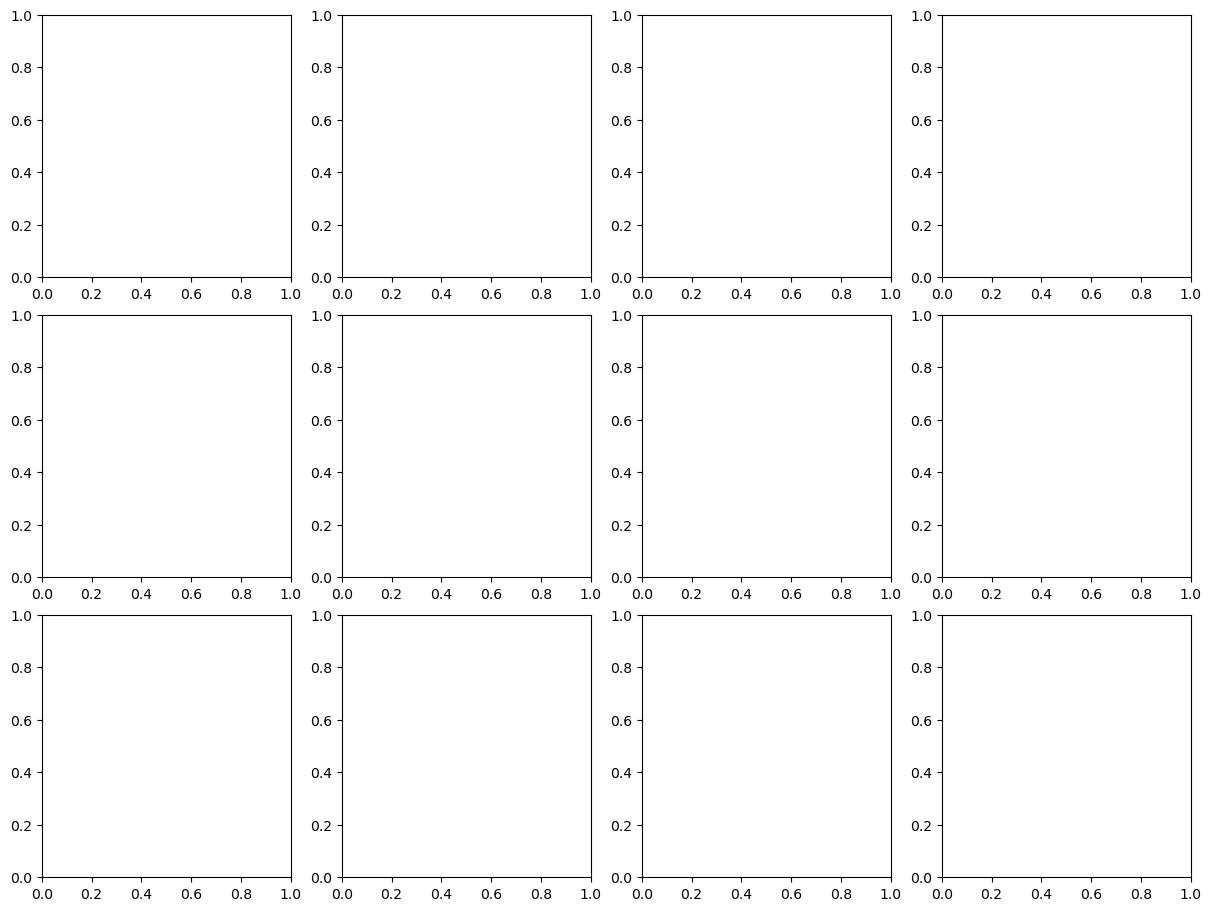

In [74]:

eigenvalues, eigenvectors = np.linalg.eigh(A_tensor)
x_axis = np.linspace(-1, 1, 1000)
y_axis = np.linspace(-1, 1, 1000)
x_axis, y_axis = np.meshgrid(x_axis, y_axis)

values = l(x_axis)
print(values.shape, np.sqrt(np.maximum(eigenvalues, 0)).shape)
print(eigenvalues.shape, eigenvectors.shape)
#eigenvectors_functions = (values.T @ eigenvectors) * np.sqrt(np.maximum(eigenvalues, 0))
num_rows = 3  # Example: Replace with the upper limit of your 'i' loop (+1 if range(N))
num_cols = 4  # Example: Replace with the upper limit of your 'j' loop (+1 if range(N))

# --- Create the Figure and the grid of Axes objects ---
# fig is the whole figure window
# axs is a 2D numpy array holding the individual plot axes (axs[row, col])
# figsize controls the overall size of the figure in inches
# constrained_layout=True or tight_layout() helps prevent labels/titles overlapping
fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3),
                       constrained_layout=True) # Or use fig.tight_layout() later


# --- Your Nested Loops ---
print(f"Generating {num_rows}x{num_cols} grid of plots...")
for i in range(num_rows):      # Your loop for rows
    for j in range(num_cols):  # Your loop for columns

        # Select the specific Axes object for the current (i, j)
        ax = axs[i, j]
        if(i==1 and j==1):
            print(eigenvalues[i][j].shape, eigenvectors[i][j].shape)
        
        

        # Example: Maybe plot data from your previously calculated C matrix
        # if C.shape == (num_rows, num_cols, some_dim1, some_dim2):
        #    # Example: Plot the diagonal of the matrix C[i, j, :, :]
        #    if C[i, j].shape[0] == C[i, j].shape[1]: # Check if square
        #       diag_data = np.diag(C[i, j])
        #       ax.plot(diag_data, marker='o', linestyle='--')
        #    else:
        #       # Or maybe plot the first row?
        #       ax.plot(C[i, j, 0, :])

        # Example: Plot an image if your data is 2D per (i, j)
        # if data_for_ij.ndim == 2:
        #    im = ax.imshow(data_for_ij, cmap='viridis', origin='lower')
        #    # fig.colorbar(im, ax=ax) # Add a colorbar if needed

        # --- Customize the subplot ---
#        ax.set_title(f'Plot (i={i}, j={j})')
#        # ax.set_xlabel("X-axis label")
#        # ax.set_ylabel("Y-axis label")
#        ax.grid(True, linestyle=':', alpha=0.6) # Add a light grid

#        print(f"  Plotted on axs[{i}, {j}]")

# --- Optional Figure-Level Customization ---
#fig.suptitle('Grid Plot Example', fontsize=16)

# --- Display the Plot ---
# plt.tight_layout() # Alternative to constrained_layout if not used in subplots()
plt.show()


In [30]:
l = lambda x: kv.legendre_normal(x, 20)
q = np.array([2,1,2,3,4,2,5,4,1])
asdf = np.zeros(q.shape)
A = (values* weights)


(21, 100, 100)

Generating 3x4 grid of plots...
  Plotted on axs[0, 0]
  Plotted on axs[0, 1]
  Plotted on axs[0, 2]
  Plotted on axs[0, 3]
  Plotted on axs[1, 0]
  Plotted on axs[1, 1]
  Plotted on axs[1, 2]
  Plotted on axs[1, 3]
  Plotted on axs[2, 0]
  Plotted on axs[2, 1]
  Plotted on axs[2, 2]
  Plotted on axs[2, 3]


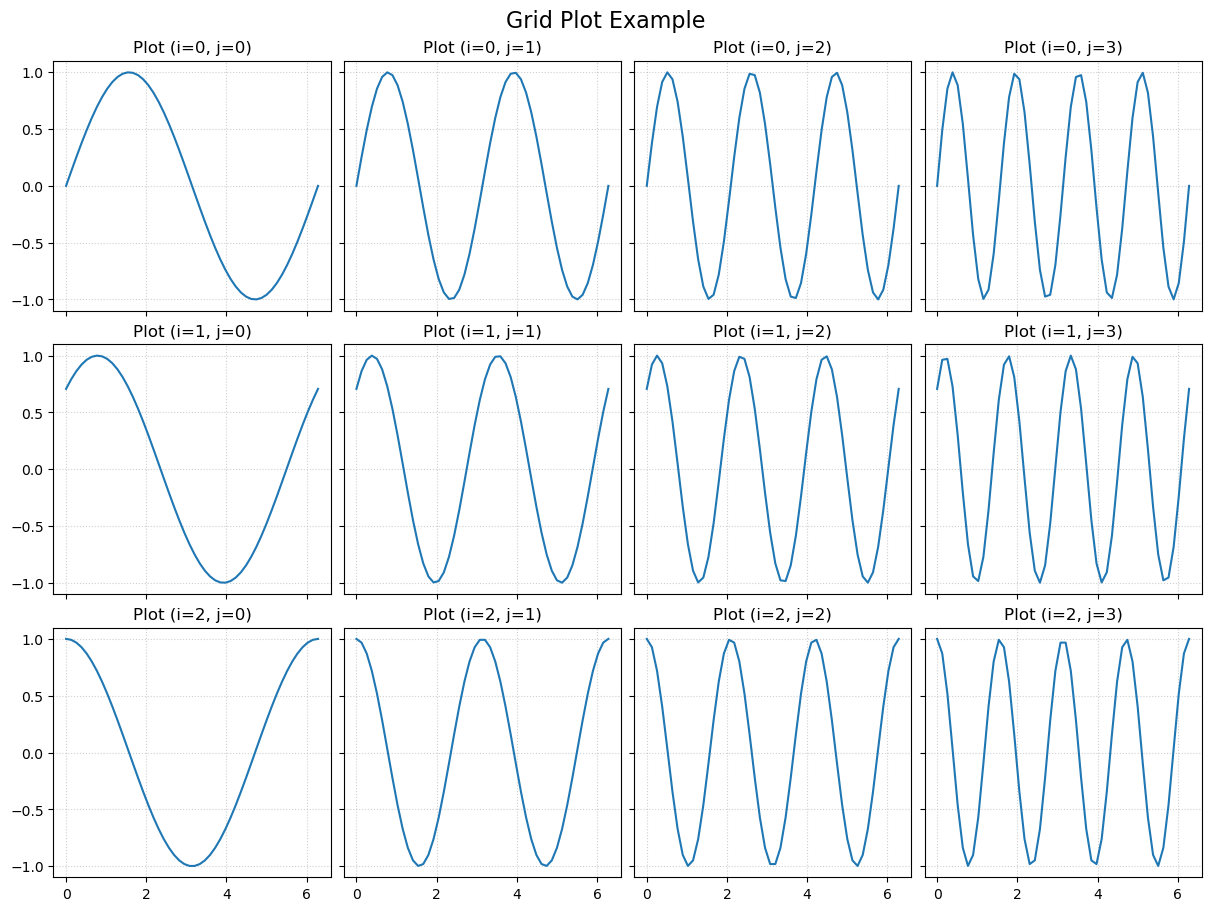

In [70]:
import matplotlib.pyplot as plt
import numpy as np # For example data

# --- Define the grid dimensions ---
# These would likely come from the ranges of your i and j loops
num_rows = 3  # Example: Replace with the upper limit of your 'i' loop (+1 if range(N))
num_cols = 4  # Example: Replace with the upper limit of your 'j' loop (+1 if range(N))

# --- Create the Figure and the grid of Axes objects ---
# fig is the whole figure window
# axs is a 2D numpy array holding the individual plot axes (axs[row, col])
# figsize controls the overall size of the figure in inches
# constrained_layout=True or tight_layout() helps prevent labels/titles overlapping
fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3),
                       constrained_layout=True) # Or use fig.tight_layout() later

# Optional: Handle cases where nrows=1 or ncols=1, as axs might be 1D or a single object
if num_rows == 1 and num_cols == 1:
    axs = np.array([[axs]]) # Make it consistently 2D
elif num_rows == 1:
    axs = axs.reshape(1, num_cols) # Make it 2D row vector
elif num_cols == 1:
    axs = axs.reshape(num_rows, 1) # Make it 2D column vector


# --- Your Nested Loops ---
print(f"Generating {num_rows}x{num_cols} grid of plots...")
for i in range(num_rows):      # Your loop for rows
    for j in range(num_cols):  # Your loop for columns

        # Select the specific Axes object for the current (i, j)
        ax = axs[i, j]

        # --- Plotting code for cell (i, j) ---
        # Replace this section with your actual plotting logic for
        # the data corresponding to iteration (i, j).

        # Example: Plot a simple sine wave whose frequency depends on j
        x = np.linspace(0, 2 * np.pi, 50)
        y = np.sin(x * (j + 1) + i * np.pi/4) # Example data depending on i, j
        ax.plot(x, y)

        # Example: Maybe plot data from your previously calculated C matrix
        # if C.shape == (num_rows, num_cols, some_dim1, some_dim2):
        #    # Example: Plot the diagonal of the matrix C[i, j, :, :]
        #    if C[i, j].shape[0] == C[i, j].shape[1]: # Check if square
        #       diag_data = np.diag(C[i, j])
        #       ax.plot(diag_data, marker='o', linestyle='--')
        #    else:
        #       # Or maybe plot the first row?
        #       ax.plot(C[i, j, 0, :])

        # Example: Plot an image if your data is 2D per (i, j)
        # if data_for_ij.ndim == 2:
        #    im = ax.imshow(data_for_ij, cmap='viridis', origin='lower')
        #    # fig.colorbar(im, ax=ax) # Add a colorbar if needed

        # --- Customize the subplot ---
        ax.set_title(f'Plot (i={i}, j={j})')
        # ax.set_xlabel("X-axis label")
        # ax.set_ylabel("Y-axis label")
        ax.grid(True, linestyle=':', alpha=0.6) # Add a light grid

        # Optional: Simplify ticks if plots are dense
        if j > 0: # Hide y-axis labels for inner columns
            ax.set_yticklabels([])
        if i < num_rows - 1: # Hide x-axis labels for inner rows
            ax.set_xticklabels([])

        print(f"  Plotted on axs[{i}, {j}]")

# --- Optional Figure-Level Customization ---
fig.suptitle('Grid Plot Example', fontsize=16)

# --- Display the Plot ---
# plt.tight_layout() # Alternative to constrained_layout if not used in subplots()
plt.show()